<a href="https://colab.research.google.com/github/hajonghyun/installPytorch_study/blob/main/3_torch_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
from torch import nn

In [14]:
!pip install torchviz
from torchviz import make_dot

# nn.Linear Shape 정리

**"입력(In)에서 출력(Out)으로 가는 흐름을 잡아라"**

1.  **모델 선언:** `nn.Linear(In, Out)`
2.  **내 데이터:** `(Batch, In)`
3.  **결과물:** `(Batch, Out)`
4.  **가중치(Weight):** `(Out, In)` <--- **이것만 주의! (수학적 정의 때문)**
5.  **편향(Bias):** `(Out)`

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.9094]], requires_grad=True)
Parameter containing:
tensor([-0.6207], requires_grad=True)
tensor([0.2887], grad_fn=<ViewBackward0>)
tensor([0.2887], grad_fn=<AddBackward0>)


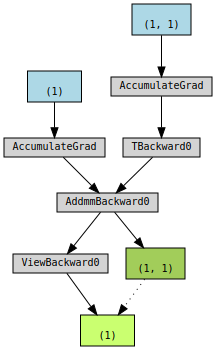

In [17]:
x=torch.tensor([1.])
model=nn.Linear(1,1)
print(model)

print(model.weight)
print(model.bias)
print("=============")
y=model(x)
print(y)

y2=x@model.weight.T+model.bias
print(y2)

make_dot(y)
#make_dot(y2)

| 구성 요소 | 코드 / 수식 | Shape (머릿속 이미지) | 비고 |
| :--- | :--- | :--- | :--- |
| **정의 (선언)** | `nn.Linear(I, O)` | **$I$개 들어와서 $O$개 나간다** | 이게 기준입니다. |
| **데이터 ($x$)** | `x` | $(N, \mathbf{I})$ | $N$: 배치 크기 (무시해도 됨) |
| **가중치 ($W$)** | `model.weight` | $(\mathbf{O}, \mathbf{I})$ | **★ 순서가 반대! (Out, In)** |
| **편향 ($b$)** | `model.bias` | $(\mathbf{O})$ | 출력 개수만큼 더해짐 |
| **결과 ($y$)** | `y` | $(N, \mathbf{O})$ | 배치는 그대로, 특징만 바뀜 |

```python
import torch.nn as nn

# x: (Batch=10, Input=3)
# Linear: (Input=3) -> (Output=5)
#   -> 실제 저장된 weight: (5, 3)

# [검증]
# x            @   weight.T         + bias
# (10, 3)      @   (3, 5)           + (5,)
#    ╰── (3)끼리 도킹 ──╯
#           (10, 5)                 + (5,)  <-- (Broadcasting)
#                 ╰── 최종 결과: (10, 5) ──╯

y_manual = x @ model.weight.T + model.bias
```

torch.Size([3, 1])
torch.Size([3])
torch.Size([1, 3])
torch.Size([1])
tensor([0.5298, 0.3368, 0.3058], grad_fn=<ViewBackward0>)
tensor([0.6799], grad_fn=<ViewBackward0>)
======수식과 비교=======
tensor([0.6799], grad_fn=<AddBackward0>)


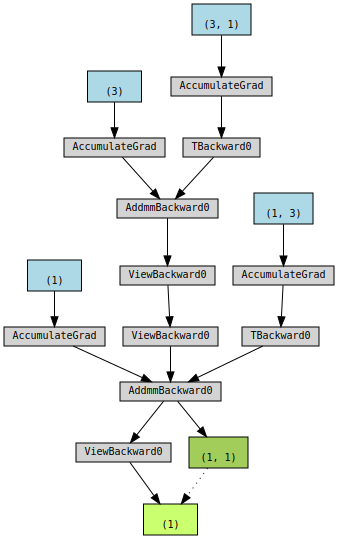

In [23]:
# 예제

fc1=nn.Linear(1,3)
fc2=nn.Linear(3,1)

print(fc1.weight.shape) # weight.T는 1*3
print(fc1.bias.shape)   # bias는 3

print(fc2.weight.shape) # weight.T는 3*1
print(fc2.bias.shape) # bias는 1

print("===============")

x=torch.tensor([1.])
x1=fc1(x)
print(x1) # fc1의 output은 3개
x2=fc2(x1)
print(x2) # fc2의 output은 1개

print("======수식과 비교=======")
y=(x@fc1.weight.T+fc1.bias)@fc2.weight.T+fc2.bias
print(y) # x2 값과 동일하면 됨
make_dot(x2)

torch.Size([3, 2])
torch.Size([3])
tensor([0.2353, 1.5660])
tensor([ 1.0839,  0.9980, -0.3163], grad_fn=<ViewBackward0>)


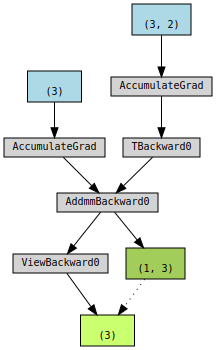

In [26]:
# 예제
model=nn.Linear(2,3)
x=torch.randn(2)

print(model.weight.shape) # weight.T는 2*3
print(model.bias.shape) # 3

print(x) # input은 2개
print(model(x)) # output은 3개

# nn.Linear는 데이터의 shape의 마지막 차원이 '채'로(1D data) 들어오길 기대하는 녀석이다.
# 입력 노드 하나가 곧 하나의 채널(피쳐)값을 의미
# '채널'은 'TV채널'의 '채널' 같이 특정 유형의 정보를 전달하는 통로. 즉, 피쳐(특징)와 의미적으로 거의 비슷함

make_dot(model(x))

# `nn.Linear` 입력 구조와 용어 정리

`nn.Linear`가 데이터를 어떻게 바라보는지, 그리고 혼용되는 용어(피쳐, 채널)들의 진짜 의미를 "엑셀"과 "소개팅"에 비유하여 정리합니다.

## 1. 용어 통일: 다 같은 말이다!
딥러닝 분야에서는 출신(통계, 영상처리 등)에 따라 같은 대상을 다르게 부르곤 합니다.

| 용어 | 원래 의미 | `nn.Linear`에서의 의미 | 비유 (소개팅) |
| :--- | :--- | :--- | :--- |
| **피쳐 (Feature)** | 데이터의 특징 | 입력 벡터의 한 요소 | **키, 몸무게, 연봉** (평가 항목) |
| **채널 (Channel)** | 정보의 통로 (TV/이미지) | **피쳐와 100% 동일한 말** | **키 채널, 몸무게 채널** |
| **입력 노드** | 신경망의 입구 | 피쳐 개수만큼 필요함 | **평가 항목 개수** (3개) |

> **핵심:** "입력 노드 하나가 곧 하나의 채널(피쳐) 값을 의미한다."

## 2. 엑셀(Excel)로 보는 데이터 구조

`nn.Linear`는 데이터를 **"한 사람(Sample)당 한 줄(Row)"**로 봅니다.

| 번호 (Batch Index) | **키 (Feature 1)** | **몸무게 (Feature 2)** | **연봉 (Feature 3)** |
| :--- | :---: | :---: | :---: |
| 1번 남자 | 180 | 75 | 5000 |
| 2번 남자 | 170 | 65 | 6000 |
| ... | ... | ... | ... |

* **1D Data (1차원 데이터):** 한 사람의 정보는 `[180, 75, 5000]`처럼 **한 줄(Vector)**로 표현됩니다.
* **마지막 차원:** 위 표에서 가로 항목의 개수(**3개**)입니다.

## 3. 코드와 매핑 (`nn.Linear`의 시선)

`nn.Linear`는 데이터가 몇 명(Batch Size) 왔는지는 신경 쓰지 않습니다. 오직 **"한 명당 들고 있는 정보가 몇 개냐"**만 확인합니다.

```python
# 상황: 소개팅 남자가 10명(Batch), 평가 항목은 3개(Feature)
x = torch.randn(10, 3)

# 모델 정의: (입력 구멍 개수, 출력 개수)
# 여기서 앞의 숫자 '3'이 위 엑셀 표의 '열(Column) 개수'와 일치해야 함!
model = nn.Linear(3, 1)
```

* **데이터 Shape:** `(10, 3)` $\rightarrow$ `(사람 수, 피쳐 개수)`
* **모델 기대치:** "나한테 들어오려면 무조건 **끝자리가 3개**여야 해!"
* **작동 원리:** 10명의 사람을 한 명씩 차례대로(병렬로) 처리하여, 각각의 키/몸무게/연봉을 봅니다.

## 4. 요약
1.  **피쳐(Feature) = 채널(Channel) = 엑셀의 열(Column).**
2.  `nn.Linear`는 입력 데이터의 **마지막 차원(피쳐 개수)**이 자신의 입력 노드 개수(`in_features`)와 똑같기를 기대한다.
3.  "1D Data로 들어온다"는 말은, **"이미지처럼 가로x세로(2D) 판때기가 아니라, 엑셀 한 줄처럼 쫙 펴진 데이터"**를 원한다는 뜻이다.

In [28]:
# 예제1
model = nn.Linear(2,3)
# 따라서, 데이터 여러 개를 통과시키고 싶다면 개X채 의 형태로 줘야 함. ('채X개'나 '개*채' 이런 식으로 말고!!!)

x=torch.randn(5,2) #개X채=> 2 채널 값(키, 몸무게)를 가지는 데이터(사람) 5개
print(model(x))

tensor([[ 0.3599,  0.7876, -0.6542],
        [ 0.4428,  1.0062, -0.5008],
        [ 1.0684,  0.0209, -0.8886],
        [ 1.4776, -0.5213, -1.0823],
        [ 0.5496,  0.7935, -0.5931]], grad_fn=<AddmmBackward0>)


In [30]:
# 예제2
model = nn.Linear(2,3)

x=torch.randn(4,5,2)
# nn.Linear는 이거를 '개X개X채'로 들어왔다고 생각함!!!

# 2채널을 가진 사람 5개가 4개의 조를 이룸.

print(model(x))

tensor([[[ 0.0960,  0.1673, -0.2274],
         [-0.8576,  0.3451, -0.8589],
         [-0.2016, -0.4282,  0.0508],
         [-0.5665,  0.3454, -0.7060],
         [ 0.2593, -0.9531,  0.6764]],

        [[-0.6009, -0.6581,  0.0085],
         [-0.7581,  0.3892, -0.8387],
         [-0.2519,  0.2033, -0.4367],
         [-0.0244, -0.0177, -0.1557],
         [-2.2402,  0.1820, -1.4671]],

        [[-1.1417, -0.3633, -0.4912],
         [-1.3848, -0.8749, -0.2456],
         [-1.6505, -0.6021, -0.5845],
         [-0.1705,  0.2464, -0.4254],
         [ 0.4681, -0.2453,  0.2696]],

        [[-0.8503, -0.8881,  0.0452],
         [-0.7415, -0.7000, -0.0348],
         [ 0.4457,  0.4336, -0.2378],
         [-1.3771, -0.8311, -0.2735],
         [-0.0701,  0.7367, -0.7305]]], grad_fn=<ViewBackward0>)


torch.Size([2, 3, 6, 4, 5, 3])


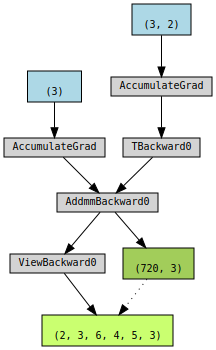

In [32]:
model = nn.Linear(2,3)

x=torch.randn(2,3,6,4,5,2)

print(model(x).shape)
make_dot(model(x))

tensor([-0.2363], grad_fn=<ViewBackward0>)
tensor([-0.2363], grad_fn=<ViewBackward0>)


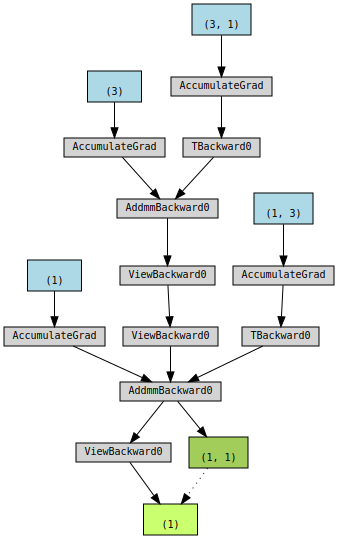

In [38]:
# Sequential로 layer 풀칠
fc1=nn.Linear(1,3)
fc2=nn.Linear(3,1)

x=torch.tensor([1.])
x=fc1(x)
x=fc2(x)
print(x)

x=torch.tensor([1.])
fc3=nn.Sequential(fc1,fc2)
x2=fc3(x)
print(x2)

make_dot(x2) # sequential은 딱히 표시는 안함

In [39]:
# sequential 예제2
model = nn.Sequential(nn.Linear(2,5),
                      nn.Linear(5,10),
                      nn.Linear(10,3))

x=torch.randn(5,2)
print(x)
print(model(x))

tensor([[-1.2832, -0.6546],
        [-0.6790, -0.6033],
        [ 0.2244,  1.0140],
        [ 0.3329, -0.4608],
        [-0.6626,  0.3533]])
tensor([[ 0.1833,  0.0787, -0.3260],
        [ 0.1636,  0.1606, -0.2968],
        [ 0.2185,  0.2893, -0.4665],
        [ 0.1336,  0.2979, -0.2559],
        [ 0.2154,  0.1667, -0.4282]], grad_fn=<AddmmBackward0>)


### Part 1. 기존 `nn.Linear` vs `class MyModel`

지금까지 배운 것과 이 코드의 결정적 차이는 **"부품이냐, 완제품이냐"**입니다.

| 구분 | 기존 (`nn.Linear`) | 현재 (`class MyModel`) |
| :--- | :--- | :--- |
| **정체** | **부품 (Layer)** | **완제품 (Network/Model)** |
| **비유** | 레고 블록 1개 | 레고 성(Castle) |
| **기능** | 입력 $\to$ 선형변환 $\to$ 출력 (단순) | 입력 $\to$ (선형1 $\to$ 활성 $\to$ 선형2...) $\to$ 출력 (복합) |
| **유연성** | 수정 불가능 (고정된 기능) | **내 맘대로 설계 가능** (순서, 개수 조절) |

> **핵심:** `MyModel`이라는 거대한 박스 안에 `fc1`, `fc2`, `fc3`라는 `nn.Linear` 부품 3개를 **"소유(self)"**하고, 그것들을 `forward` 함수에서 **"조립(연결)"**한 것입니다.

tensor([[0.4749, 0.4946, 0.4771],
        [0.4738, 0.4939, 0.4769],
        [0.4788, 0.4922, 0.4799],
        [0.4777, 0.4937, 0.4787],
        [0.4823, 0.4908, 0.4819]], grad_fn=<SigmoidBackward0>)


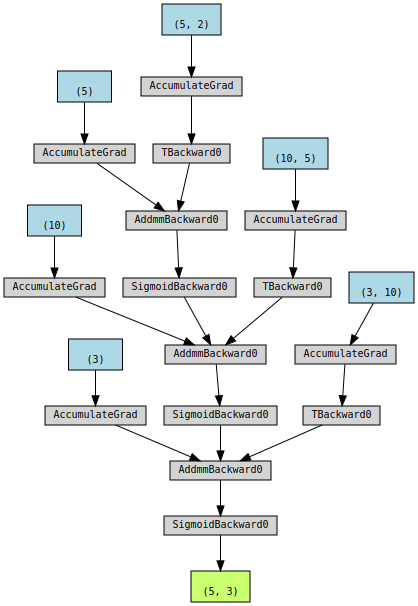

In [42]:
# MyModel

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1=nn.Linear(2,5)
        self.fc2=nn.Linear(5,10)
        self.fc3=nn.Linear(10,3)
        self.act=nn.Sigmoid()

    def forward(self,x):
        x=self.fc1(x)
        x=self.act(x)
        x=self.fc2(x)
        x=self.act(x)
        x=self.fc3(x)
        x=self.act(x)
        return x

model = MyModel()
x=torch.randn(5,2)
y=model(x)
# model.forward(x) (nn.Module의 __call__에서 forward를 통과시킴) (__call__은 인스턴스()로 실행하는 메소드)
print(y)

make_dot(y)

# 📘 `MyModel` 클래스 코드 완벽 분석

이 문서는 PyTorch를 사용하여 사용자 정의 신경망(`MyModel`)을 구현하는 전체 코드를 한 줄씩 뜯어보며, **객체지향 개념(상속, 오버라이딩)**과 **딥러닝 데이터 흐름(Shape)**을 완벽하게 정리한 복습 자료입니다.

---

## 1. 클래스 선언과 상속 (Inheritance)

```python
class MyModel(nn.Module):
```

* **코드 분석:** `MyModel`이라는 새로운 클래스를 만드는데, `nn.Module`을 **상속(Inheritance)** 받겠다고 선언하는 부분입니다.
* **핵심 개념:**
    * **상속:** `nn.Module`(부모 클래스)이 가진 강력한 기능들(GPU 연산, 파라미터 저장/로드, 역전파 관리 등)을 `MyModel`(자식 클래스)이 그대로 물려받습니다.
    * 이 한 줄 덕분에 우리는 복잡한 내부 로직을 구현하지 않고도 딥러닝 모델을 만들 수 있습니다.

---

## 2. 초기화 메서드 (Initialization & Registry)

```python
    def __init__(self):
        super().__init__()
```

* **코드 분석:**
    * `def __init__(self):`: 부모의 초기화 메서드를 무시하고, 나만의 부품을 정의하기 위해 **메서드 오버라이딩(Method Overriding)**을 하는 구간입니다.
    * `super().__init__()`: 오버라이딩으로 인해 가려진 **부모(`nn.Module`)의 초기화 메서드를 명시적으로 호출**합니다.
* **왜 필수인가요?**
    * PyTorch의 **"비밀 장부(`_modules`, `_parameters`)"**를 생성하는 과정입니다.
    * 이 줄이 없으면, 내가 아무리 레이어를 추가해도 PyTorch 시스템은 그 레이어의 존재를 인식하지 못해 학습이 불가능해집니다.

---

## 3. 부품 정의 (Layers & Ownership)

```python
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 3)
        self.act = nn.Sigmoid()
```

* **코드 분석:** 모델이 사용할 부품(Layer)들을 생성하고, **`self.`를 붙여 인스턴스 변수로 저장**합니다.
* **핵심 개념:**
    * **`self`의 역할:** "이 변수는 내 소유다."라고 명시하여, 함수가 끝나도 메모리에서 사라지지 않게 붙잡아두는 역할을 합니다.
    * **Shape 흐름 (샌드위치 법칙):**
        * `fc1`: 입력(2) $\to$ 출력(5)
        * `fc2`: 입력(5) $\to$ 출력(10) (앞 레이어의 출력과 맞춤)
        * `fc3`: 입력(10) $\to$ 출력(3) (최종 클래스 개수 등)
    * **`nn.Linear`의 의미:** `(입력 차원, 출력 차원)`을 인자로 받으며, 내부적으로 `Weight`와 `Bias`라는 **학습 가능한 파라미터(Leaf Tensor)**를 생성합니다.

---

## 4. 순전파 정의 (Forward Propagation)

```python
    def forward(self, x):
```

* **코드 분석:** 데이터 `x`가 들어왔을 때, 어떤 순서로 처리될지 정의하는 **메서드 오버라이딩** 구간입니다.
* **주의사항:**
    * 부모의 `forward`는 비어있는 **추상 메서드(Abstract Method)**와 같습니다.
    * 따라서 `super().forward(x)`를 호출하지 않고, **우리가 짠 로직으로 100% 덮어씌워야** 합니다.

```python
        x = self.fc1(x)  # 선형 변환 1
        x = self.act(x)  # 비선형성 추가 (활성화 함수)
        x = self.fc2(x)  # 선형 변환 2
        x = self.act(x)
        x = self.fc3(x)  # 선형 변환 3 (최종 출력)
        x = self.act(x)
        return x
```

* **데이터 흐름 (`x`의 Shape 변화):**
    * 입력 `x`: `(Batch, 2)`
    * `fc1` 통과 후: `(Batch, 5)`
    * `fc2` 통과 후: `(Batch, 10)`
    * `fc3` 통과 후: `(Batch, 3)` $\rightarrow$ **최종 반환**

---

## 5. 모델 실행 (Instantiation & Execution)

```python
model = MyModel()
x = torch.randn(5, 2)
y = model(x)
```

* **`model = MyModel()`:** 설계도(Class)를 바탕으로 실제 작동하는 기계(**인스턴스**)를 생성합니다. 이때 `__init__`이 실행됩니다.
* **`x = torch.randn(5, 2)`:**
    * `5`: 배치 사이즈 (데이터 개수, `N`). 모델은 이 숫자에 관여하지 않습니다.
    * `2`: 입력 피쳐 개수 (`Input Feature`). `fc1`의 입력 차원(`2`)과 반드시 일치해야 합니다.
* **`y = model(x)`:**
    * **매직 메서드 `__call__`:** 우리가 `model.forward(x)`라고 쓰지 않아도, 객체를 함수처럼 호출하면 내부적으로 알아서 `forward(x)`를 연결해 실행합니다.

---

## 6. 시각화 (`make_dot`)

```python
make_dot(y)
```

* **파란색 박스 (AccumulateGrad):** `requires_grad=True`인 **학습 대상(파라미터)**들입니다.
    * `MyModel` 내부의 `fc1, fc2, fc3`가 가진 `weight`와 `bias`들이 여기에 해당합니다.
* **초록색/하늘색 박스:** 연산의 중간 결과값(Tensor)이나 최종 출력값 `y`입니다.
* **그래프의 의미:** `y`를 만들기 위해 `x`부터 시작해서 어떤 연산들이 꼬리에 꼬리를 물고 이어졌는지 보여주는 **역전파(Backpropagation) 지도**입니다.

---

### ✅ 3줄 요약

1.  **`class` & `super`:** `nn.Module`을 상속받고, `super().__init__()`으로 족보(장부)를 등록해야 온전한 모델이 된다.
2.  **`__init__`:** 필요한 부품(`Linear`, `Sigmoid`)을 미리 사서 `self` 주머니에 넣어두는 곳.
3.  **`forward`:** 사둔 부품을 조립해서 데이터 `x`가 지나가는 길을 만드는 곳. (자동 실행됨)

# PyTorch 모델 실행 메커니즘 분석: `__call__`과 `forward`

`model(x)` 코드가 실행될 때 내부에서 일어나는 일과, 왜 `forward`를 직접 호출하면 안 되는지에 대한 핵심 정리입니다.

## 1. 파이썬의 매직 메서드: `__call__`
파이썬 객체지향 문법에는 **"객체를 함수처럼 괄호 `()`로 실행"**할 수 있게 해주는 특수 메서드가 있습니다.

* **원리:** 코드에서 `인스턴스()`를 호출하면, 파이썬 인터프리터는 자동으로 그 객체 내부의 `__call__` 메서드를 찾아 실행합니다.
* **비유:** "마법의 자동 연결 버튼"

## 2. PyTorch 내부 동작 (`nn.Module`의 설계)
우리가 상속받은 `nn.Module` 부모 클래스는 `__call__`을 이미 정교하게 구현해 두었습니다.

### 실행 흐름도
1.  **User Code:** `model(x)` 실행
2.  **Magic Method:** `nn.Module.__call__(x)` 발동
3.  **Pre-processing:**
    * Hooks 실행 (전처리)
    * 장치(Device) 확인
    * 미분 추적 상태 확인
4.  **Forwarding:** **`self.forward(x)` 호출 (우리가 짠 코드 실행)**
5.  **Post-processing:**
    * Hooks 실행 (후처리)
6.  **Return:** 결과 반환

## 3. 핵심 질문: "왜 `model.forward(x)`를 직접 쓰면 안 되나요?"

`model.forward(x)`를 직접 호출하면, 위 흐름도에서 2, 3, 5번 과정이 **모두 생략**되고 오직 4번만 실행됩니다.

| 구분 | 코드 | 내부 동작 | 추천 여부 |
| :--- | :--- | :--- | :--- |
| **권장** | `model(x)` | `__call__` $\to$ `Hooks` $\to$ `forward` | **✅ (필수)**<br>PyTorch의 모든 안전장치와 기능 작동 |
| **금지** | `model.forward(x)` | `forward` (직행) | ❌ (절대 금지)<br>Hooks, 장치 확인 등 핵심 기능 무시됨 |

> **한 줄 요약:**
> "`model(x)`는 부모(`nn.Module`)가 차려놓은 **안전한 밥상(`__call__`)** 위에서 내가 요리한 **반찬(`forward`)**을 먹는 것이고, `forward(x)` 직접 호출은 맨바닥에서 반찬만 집어 먹는 것이다."

In [46]:
import torch
from torch import nn

class BrokenModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 5)
        self.layer2 = nn.Linear(5, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

model = BrokenModel()
input_data = torch.randn(1, 10)
output = model(input_data)

In [47]:
class FlowModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 입력 데이터 x의 shape은 (Batch_size, 100) 이라고 가정.

        self.fc1 = nn.Linear(100, 50)
        self.fc2 = nn.Linear(50, 20)   # A: ?에는 뭐가 들어가야 할까?
        self.fc3 = nn.Linear(20, 1)    # B: ?에는 뭐가 들어가야 할까?

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x